<a href="https://colab.research.google.com/github/Cyber-Mood/Mahmud-PDS/blob/main/Online_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries and Load Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv('/content/salesdataset.csv')
df.head()
df.tail()  #instead of head and tail, just print df. Or you can use df.sample(any number)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,05-09-25 01:00,70.92,51445,Spain,0.20,Credit Card,8.96,Electronics,Online,1,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,05-09-25 02:00,51.74,28879,United States,0.23,Bank Transfer,23.55,Electronics,Online,0,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,05-09-25 03:00,85.25,21825,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,0,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,05-09-25 04:00,39.64,43199,United Kingdom,0.31,paypall,28.56,Apparel,Online,0,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,05-09-25 05:00,38.27,53328,France,0.10,Credit Card,9.13,Stationery,Online,0,UPS,Rome,Low


In [10]:
# Show the information of data to find any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         49782 non-null  int64  
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       49782 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  int64  
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  49782 non-null  object 
 16  OrderPriority      497

In [9]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64


#Data Visualization

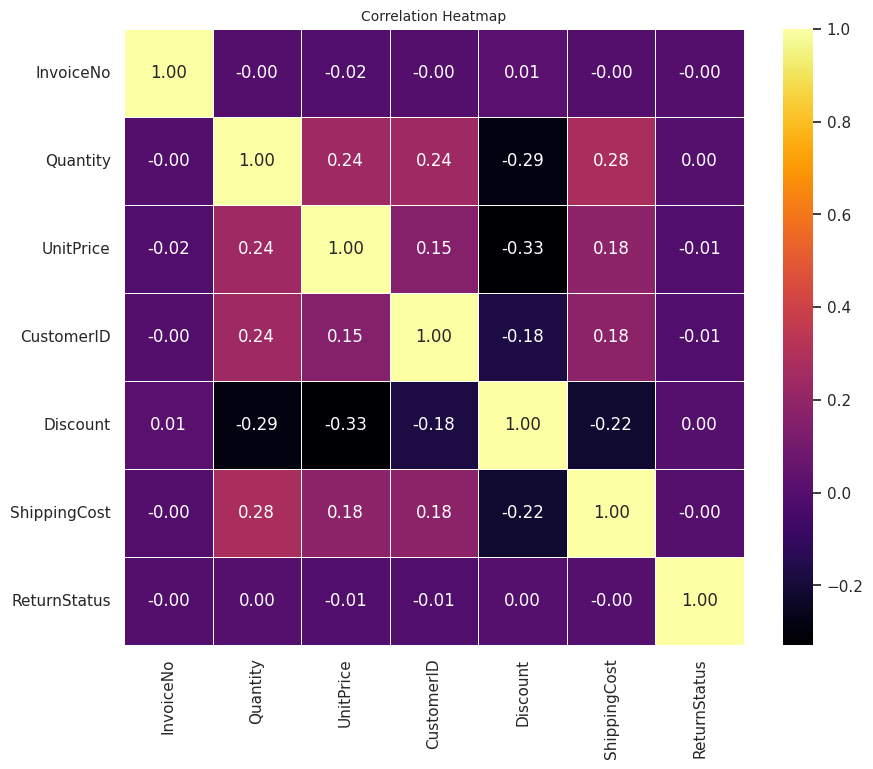

In [19]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Correlation Heatmap
def plot_correlation_heatmap(data):
    data=data.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=10)
    plt.show()

plot_correlation_heatmap(df)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

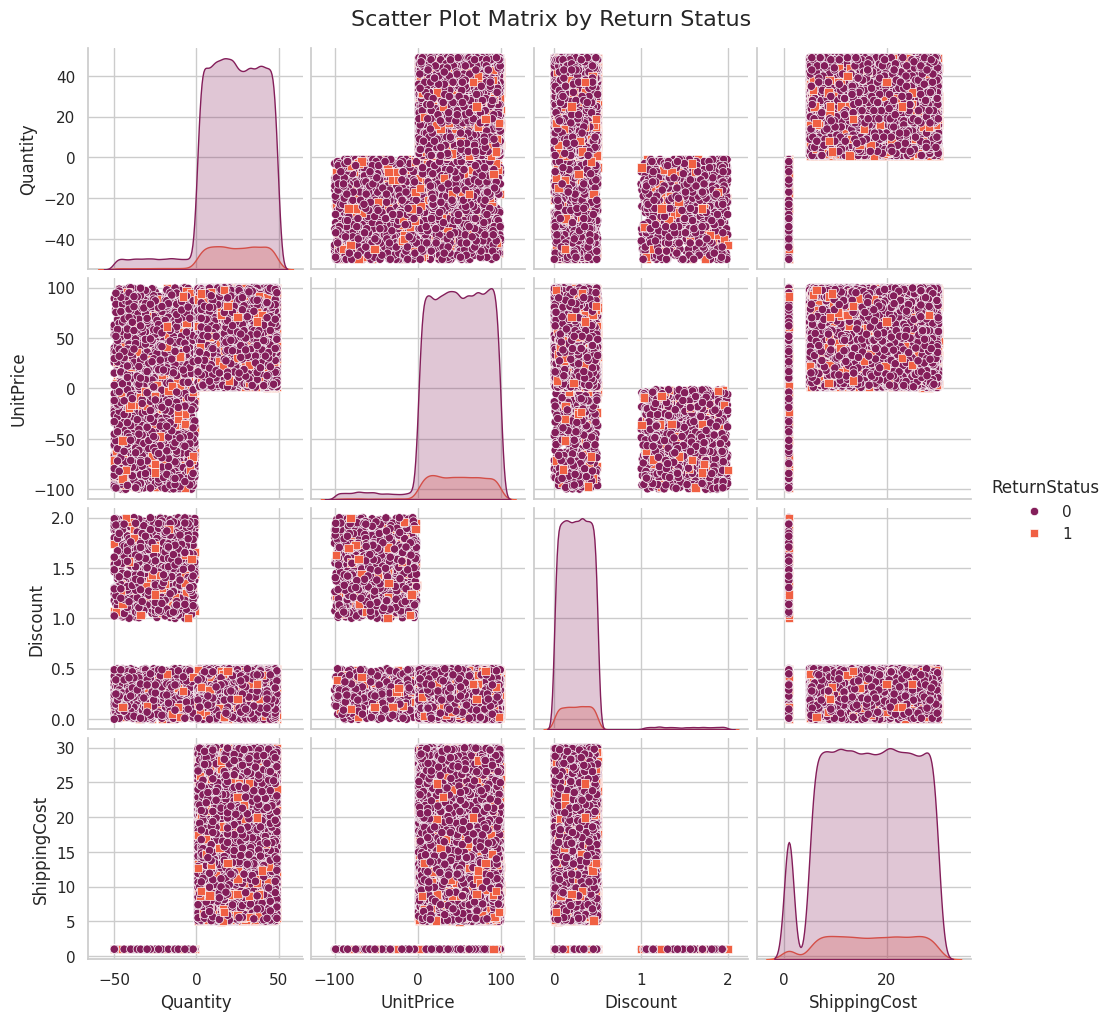

In [25]:
def plot_scatter_matrix(data, features):
    """
    Generates a scatter plot matrix using available columns.
    """
    # Select relevant columns for plotting
    plot_data = data[features + ['ReturnStatus']]

    # Create the pairplot with 'ReturnStatus' as hue
    sns.pairplot(
        plot_data,
        hue='ReturnStatus',
        palette='rocket',
        diag_kind="kde",
        markers=['o', 's', 'D'],  # Use different markers for return statuses
    )

    # Add a title to the plot
    plt.suptitle("Scatter Plot Matrix by Return Status", y=1.02, fontsize=16)

    # Display the plot
    plt.show()

# Select numerical features
features = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

# Call the function to generate the scatter plot matrix
plot_scatter_matrix(df, features)

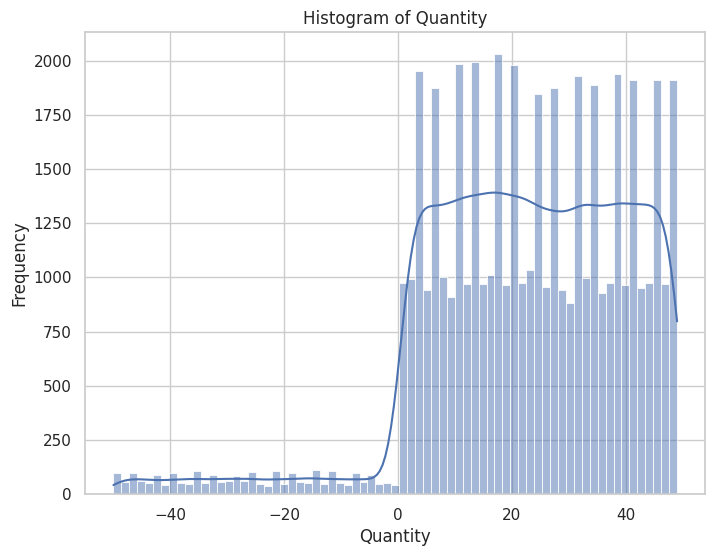

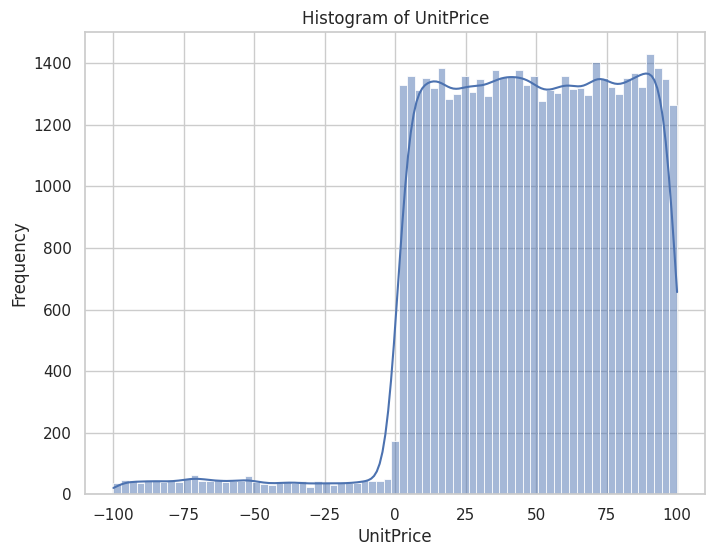

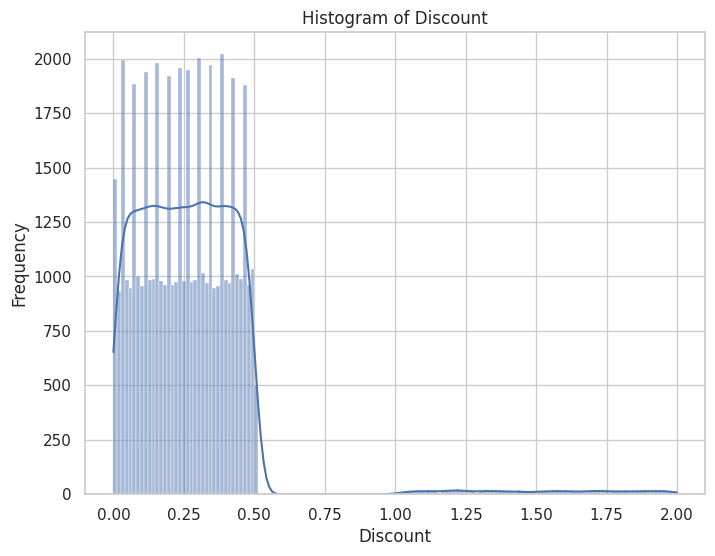

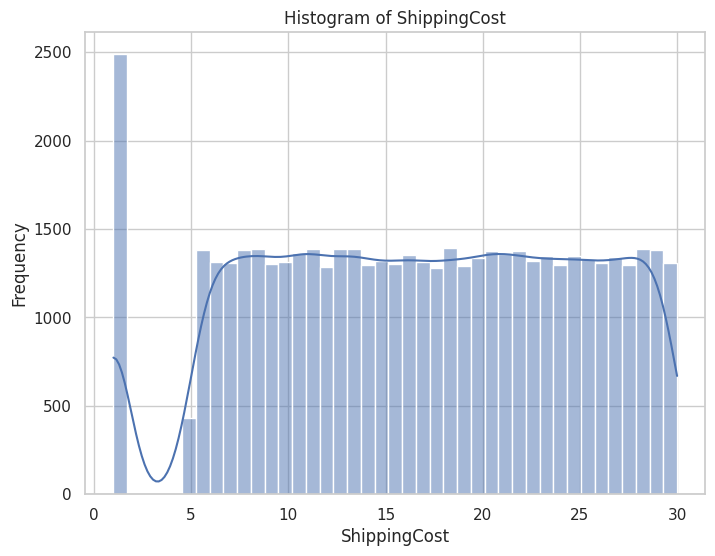

In [21]:
def plot_histograms(data, features):
    """
    Plots histograms for specified numerical features.
    """
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[feature], kde=True)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()


# Select numerical features for histograms
features_for_histograms = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

# Call the function to generate histograms
plot_histograms(df, features_for_histograms)

#Split Data

Mean Squared Error: 2393.8058563674567
R-squared: -0.11872007547712227


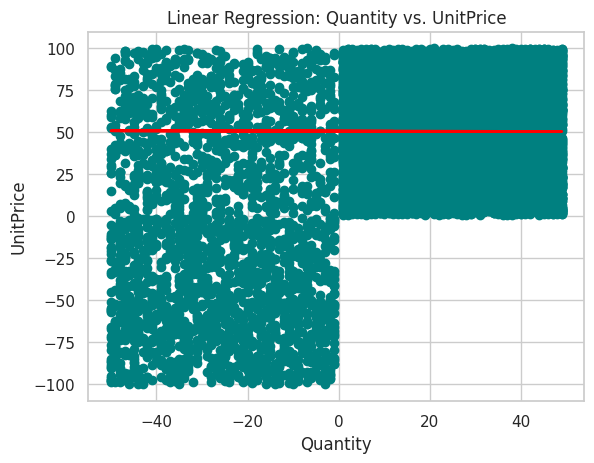

In [29]:
# Assuming 'UnitPrice' is the target variable and 'Quantity' is the predictor
X = df[['Quantity']]
y = df['UnitPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.scatter(X_test, y_test, color='teal')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Linear Regression: Quantity vs. UnitPrice')
plt.show()

In [30]:
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9020789394395903


#Different Models

##*Logistic Regression*

In [31]:
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Logistic Regression Accuracy: 0.9020789394395903

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8982
           1       0.00      0.00      0.00       975

    accuracy                           0.90      9957
   macro avg       0.45      0.50      0.47      9957
weighted avg       0.81      0.90      0.86      9957


Confusion Matrix:
      0  1
0  8982  0
1   975  0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##*Random Forest*

In [33]:
# Assuming 'ReturnStatus' is the target variable and 'Quantity', 'UnitPrice', 'Discount', 'ShippingCost' are the features
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy: 0.8060660841618962

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8982
           1       0.09      0.11      0.10       975

    accuracy                           0.81      9957
   macro avg       0.50      0.49      0.49      9957
weighted avg       0.82      0.81      0.81      9957


Confusion Matrix:
      0     1
0  7922  1060
1   871   104


In [35]:
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. ANN Model
model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_ann.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_ann = (model_ann.predict(X_test) > 0.5).astype("int32")
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {accuracy_ann}")






# 3. Random Forest Model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8863 - loss: 0.4422
Epoch 2/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8988 - loss: 0.3411
Epoch 3/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9017 - loss: 0.3316
Epoch 4/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9014 - loss: 0.3309
Epoch 5/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9011 - loss: 0.3275
Epoch 6/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9017 - loss: 0.3256
Epoch 7/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9022 - loss: 0.3233
Epoch 8/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9016 - loss: 0.3239
Epoch 9/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9018 - loss: 0.3230
Epoch 10/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9003 - loss: 0.3259
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ANN Accuracy: 0.9020789394395903
Random Forest Accuracy: 0.901576780154665


##*Decision Tree*

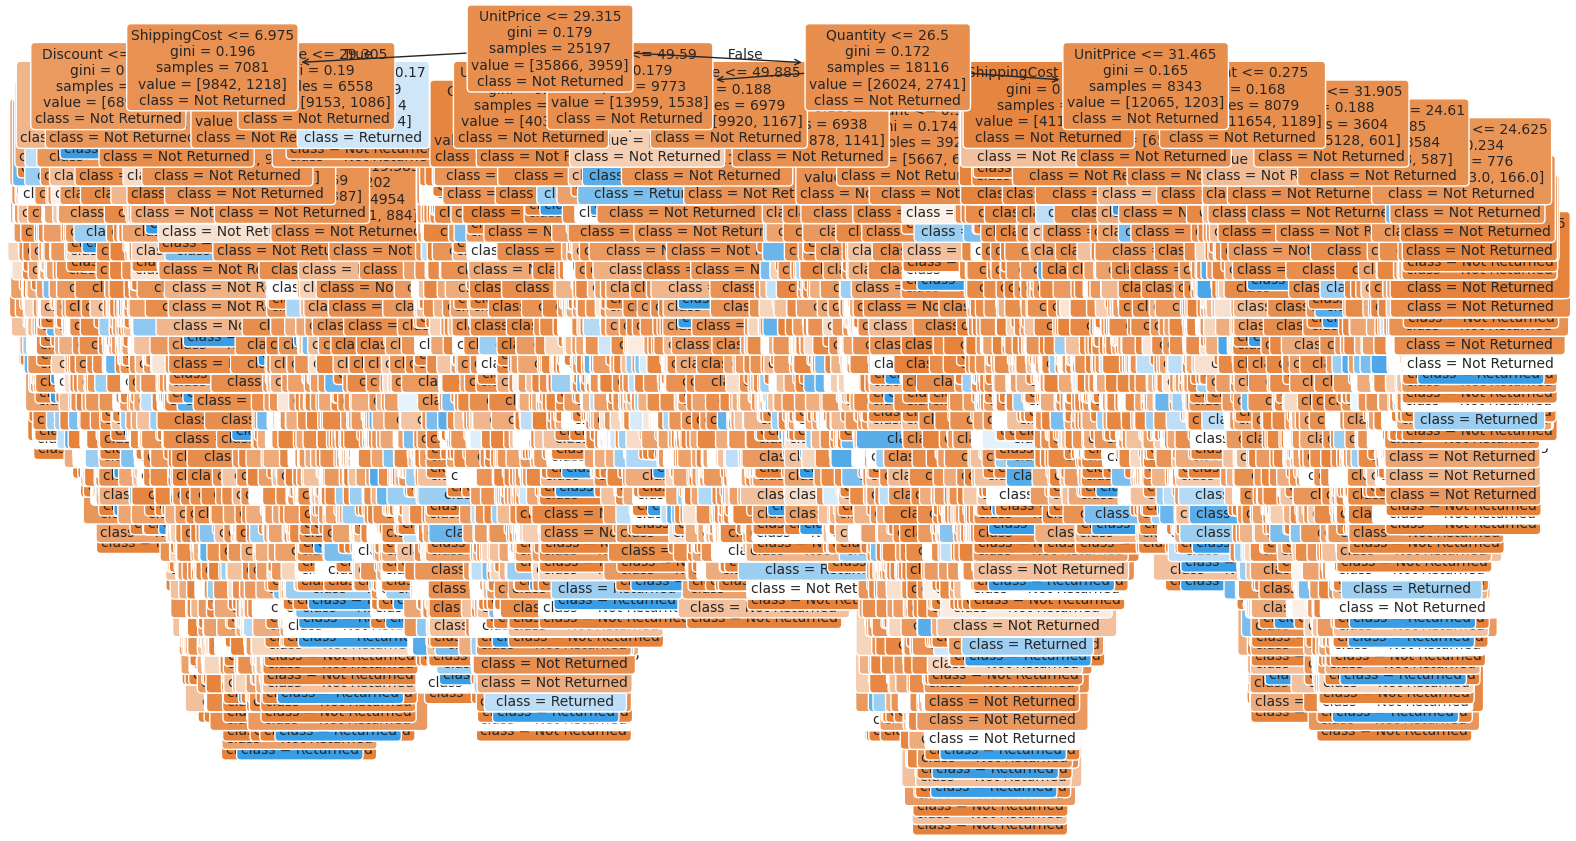

In [40]:
# Get the first decision tree from the Random Forest model
first_tree = model_rf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(18, 10))
plot_tree(first_tree,
          feature_names=X.columns,
          class_names=['Not Returned', 'Returned'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()